<a href="https://colab.research.google.com/github/Neha609/Machine-Learning-Projects/blob/gh-pages/Reduce_Credit_Default_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

ABC bank is facing the challenge of high credit default rates. One of the strategies which the bank has come up with is to identify the risky 
customers (those who are likely to default) and take proactive measures to perform actions for these risky customers before they actually default. 

As a data scientist, you are assigned this task of finding out the risky customers using data, identify the characteristics and recommend suitable
 actions which will help the bank reduce overall default rate.


The provided data set has information about 1000 customers with an indicator of if the customer defaulted the loan 

## **1. Data Collection**

In [ ]:
# importing requied libraries
import os
import pandas as pd

In [ ]:
# creating folder DataSource to keep the data 
if os.path.exists(os.path.join(os.getcwd(),'DataSource')):
  pass
else:
  os.makedirs(os.path.join(os.getcwd(),'DataSource'))

In [ ]:
# copying the raw data file from google drive to DataSource folder
!cp "/content/drive/MyDrive/Case study_M.zip (Unzipped Files)/case_study_data.xlsx" /content/DataSource/



In [ ]:
#loading data fom csv file to variable dataset
dataset = pd.read_excel('/content/drive/MyDrive/Case study_M.zip (Unzipped Files)/case_study_data.xlsx')

## **2. Data Visualization**

In [ ]:
# importing the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [ ]:
#printing top 5 record
dataset.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,6,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,3,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,5,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,6,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,6,A124,80,A143,A153,3,A173,3,A191,A201,2


In [ ]:
# checking shape of dataset
dataset.shape

(1000, 21)

In [ ]:
dataset.dtypes

checkin_acc          object
duration              int64
credit_history       object
purpose              object
amount                int64
svaing_acc           object
present_emp_since    object
inst_rate             int64
personal_status      object
other_debtors        object
residing_since        int64
property             object
age                   int64
inst_plans           object
housing              object
num_credits           int64
job                  object
dependents            int64
telephone            object
foreign_worker       object
status                int64
dtype: object

In [ ]:
dataset.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [ ]:
#Checking the list of columns present in dataset
ColList = dataset.columns
ColList

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [ ]:
#Now listing all numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ['status']]
numerical_features

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'dependents']

In [ ]:
#Making the list of categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['checkin_acc',
 'credit_history',
 'purpose',
 'svaing_acc',
 'present_emp_since',
 'personal_status',
 'other_debtors',
 'property',
 'inst_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [ ]:
# view class disrtibution
dataset.groupby('status').size()

status
1    700
2    300
dtype: int64

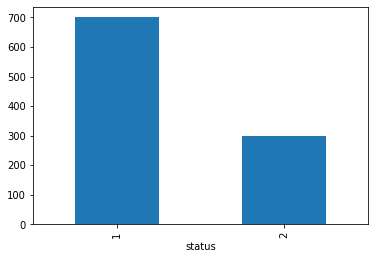

In [ ]:
#Let's just check data is balanced or imbalanced
dataset.groupby('status')['status'].count().plot.bar()
plt.show()

## **3. Data Cleaning**

In [ ]:
#Importing required libraries
import scipy.stats as stat
import pylab
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Encode categorical features
OrEncod = OrdinalEncoder()
dataset[categorical_features] = OrEncod.fit_transform(dataset[categorical_features])

In [ ]:
# viw to 5 row
dataset.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,0.0,9,4.0,4.0,1754,4.0,4.0,6,2.0,0.0,6,0.0,101,2.0,1.0,3,2.0,2,1.0,0.0,1
1,1.0,72,2.0,4.0,8927,0.0,2.0,3,1.0,0.0,3,0.0,33,2.0,1.0,2,2.0,2,0.0,0.0,2
2,3.0,18,4.0,7.0,3144,0.0,3.0,3,2.0,0.0,5,0.0,74,2.0,1.0,2,1.0,3,0.0,0.0,1
3,0.0,63,2.0,3.0,11823,0.0,3.0,3,2.0,2.0,6,1.0,68,2.0,2.0,2,2.0,3,0.0,0.0,1
4,0.0,36,3.0,0.0,7305,0.0,2.0,5,2.0,0.0,6,3.0,80,2.0,2.0,3,2.0,3,0.0,0.0,2


**Missing Values**

In [ ]:
#Checking the percentage of NaN values present in each feature
#Also making list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

In [ ]:
## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  '% missing values')
#No null values found then it will not print anything

As we can see there's no null value present in dataset so this section ended here.

In [ ]:
# summarize the number of unique value for each fetaure
dataset.nunique()

checkin_acc            4
duration              33
credit_history         5
purpose               10
amount               921
svaing_acc             5
present_emp_since      5
inst_rate              4
personal_status        4
other_debtors          3
residing_since         4
property               4
age                   53
inst_plans             3
housing                3
num_credits            4
job                    4
dependents             2
telephone              2
foreign_worker         2
status                 2
dtype: int64

In [ ]:
# list of feature which contain only one unique value
to_del = [i for i,v in enumerate(dataset.nunique()) if v == 1]
to_del

[]

In [ ]:
# drop useless fetaure which contain only one unique value
#dataset.drop(to_del, axis=1, inplace=True)
print(dataset.shape)

(1000, 21)


In [ ]:
# summarize the percentage of unique values for each feature
for i,v in (dataset[numerical_features].nunique()).iteritems():
  print('%s, %d, %.1f%%' %(i, v, float(v)/dataset[numerical_features].shape[0]*100))

duration, 33, 3.3%
amount, 921, 92.1%
inst_rate, 4, 0.4%
residing_since, 4, 0.4%
age, 53, 5.3%
num_credits, 4, 0.4%
dependents, 2, 0.2%


In [ ]:
# delete columns where number of unique values is less than 1% of the rows
to_del = [i for i,v in (dataset[numerical_features].nunique()).iteritems() if (float(v)/dataset[numerical_features].shape[0]*100) < 1]
print(to_del)
# drop useless columns
#dataset.drop(to_del, axis=1, inplace=True)
print(dataset.shape)

['inst_rate', 'residing_since', 'num_credits', 'dependents']
(1000, 21)


In [ ]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

Threshold=0.00, Features=6
Threshold=0.05, Features=6
Threshold=0.10, Features=6
Threshold=0.15, Features=6
Threshold=0.20, Features=6
Threshold=0.25, Features=6
Threshold=0.30, Features=6
Threshold=0.35, Features=6
Threshold=0.40, Features=6
Threshold=0.45, Features=6
Threshold=0.50, Features=5


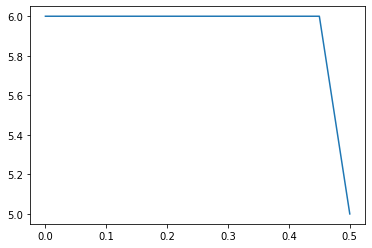

In [ ]:
# summarize the feature which have low varince
from sklearn.feature_selection import VarianceThreshold
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(dataset[numerical_features].iloc[:,:-1])
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('Threshold=%.2f, Features=%d' % (t, n_features))
  # store the result
  results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [ ]:
# summarize the duplicate row
dups = dataset.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(dataset[dups])


False
Empty DataFrame
Columns: [checkin_acc, duration, credit_history, purpose, amount, svaing_acc, present_emp_since, inst_rate, personal_status, other_debtors, residing_since, property, age, inst_plans, housing, num_credits, job, dependents, telephone, foreign_worker, status]
Index: []


In [ ]:
# delete duplicate rows
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(1000, 21)


**Outlier Handling**

In [ ]:
#Importing required libraries
import scipy.stats as stat
import pylab

In [ ]:
#Creating a function to draw plots which contains two subplots to check distribution of data and outliers as well
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

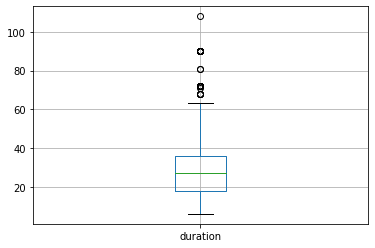

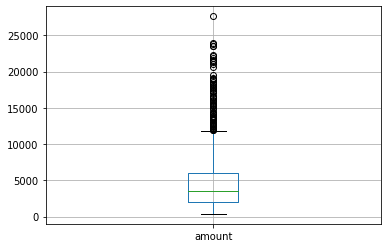

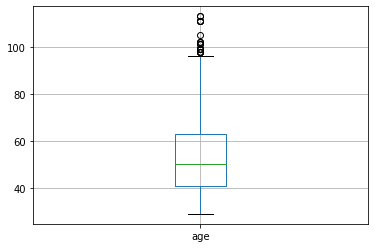

In [ ]:
# identify outliers with interquartile range
# view the outlier by ploting boxlot
for feature,count in (dataset[numerical_features].nunique()).iteritems():
  if count>4:
    figure=dataset.boxplot(column=feature)
    plt.show()

In [ ]:
# calulating upper and lowe bridge
for feature,count in (dataset[numerical_features].nunique()).iteritems():
  if count>4:
    # calculate interquartile range
    IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
    # colculating lower bridge
    lower_bridge=dataset[feature].quantile(0.25)-(IQR*3)
    #calculating upper bride
    upper_bridge=dataset[feature].quantile(0.75)+(IQR*3)
    # updating upper outlier with upper bridge
    dataset.loc[dataset[feature]>=upper_bridge,feature]=upper_bridge
    # upading lower outlier with lower bridge
    dataset.loc[dataset[feature]<=lower_bridge,feature]=lower_bridge
    print(feature)
    print(upper_bridge)
    print(lower_bridge)

duration
90.0
-36.0
amount
17689.25
-9682.5
age
129.0
-25.0


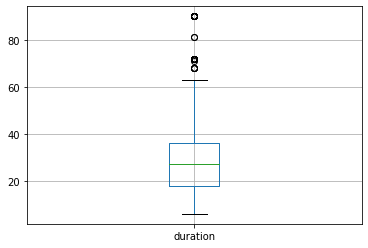

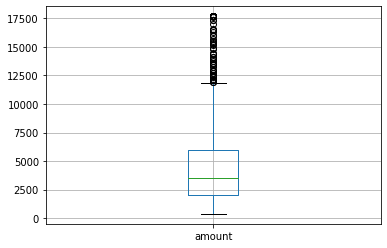

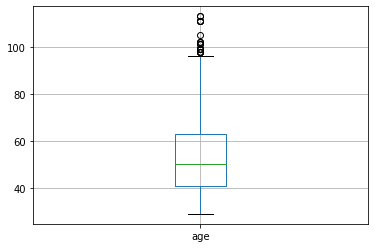

In [ ]:
# view outlier after update using box plot
for feature,count in (dataset[numerical_features].nunique()).iteritems():
  if count>4:
    figure=dataset.boxplot(column=feature)
    plt.show()

## **4. Feature Selection**

**Numerical Features**

In [ ]:
#Importing required libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# feature selection using ANOVA f-statistics for numerical features
fs = SelectKBest(score_func=f_classif, k='all')

In [ ]:
fs.fit_transform(dataset[numerical_features],dataset.iloc[:,-1])

array([[9.000e+00, 1.754e+03, 6.000e+00, ..., 1.010e+02, 3.000e+00,
        2.000e+00],
       [7.200e+01, 8.927e+03, 3.000e+00, ..., 3.300e+01, 2.000e+00,
        2.000e+00],
       [1.800e+01, 3.144e+03, 3.000e+00, ..., 7.400e+01, 2.000e+00,
        3.000e+00],
       ...,
       [1.800e+01, 1.206e+03, 6.000e+00, ..., 5.700e+01, 2.000e+00,
        2.000e+00],
       [6.800e+01, 2.768e+03, 6.000e+00, ..., 3.500e+01, 2.000e+00,
        2.000e+00],
       [6.800e+01, 6.864e+03, 5.000e+00, ..., 4.100e+01, 2.000e+00,
        2.000e+00]])

duration: 47.872271
amount: 22.512894
inst_rate: 5.071929
residing_since: 0.000019
age: 8.297885
num_credits: 2.001491
dependents: 0.009071


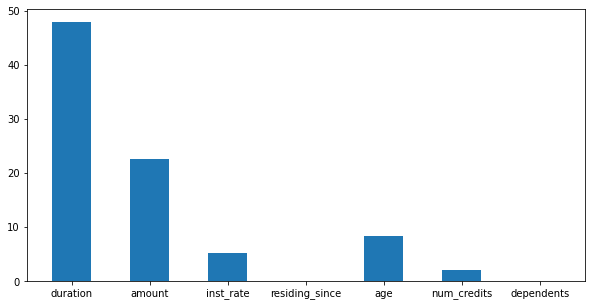

In [ ]:
# what are scores for the features
for i,feature in enumerate(numerical_features):
  print('%s: %f' % (feature, fs.scores_[i]))
# plot the scores
fig = plt.figure(figsize = (10, 5)) 
plt.bar(numerical_features, fs.scores_, width=0.5)
plt.show()

In [ ]:
# Selecting features having highest scores
numerical_features_sel = [feature for i,feature in enumerate(numerical_features) if fs.scores_[i]!=0 or fs.scores_[i]>0]
numerical_features_sel

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'dependents']

**Categorical features**

In [ ]:
# fetaure selection using mutual information fetaure selection for categorical feature
fs = SelectKBest(score_func=mutual_info_classif, k='all')

In [ ]:
fs.fit_transform(dataset[categorical_features],dataset.iloc[:,-1])

array([[0., 4., 4., ..., 2., 1., 0.],
       [1., 2., 4., ..., 2., 0., 0.],
       [3., 4., 7., ..., 1., 0., 0.],
       ...,
       [3., 2., 4., ..., 2., 0., 0.],
       [0., 2., 4., ..., 2., 1., 0.],
       [1., 4., 1., ..., 2., 0., 0.]])

checkin_acc: 0.080852
credit_history: 0.034904
purpose: 0.022457
svaing_acc: 0.008907
present_emp_since: 0.023284
personal_status: 0.000000
other_debtors: 0.023928
property: 0.013993
inst_plans: 0.016831
housing: 0.010386
job: 0.000000
telephone: 0.000000
foreign_worker: 0.002860


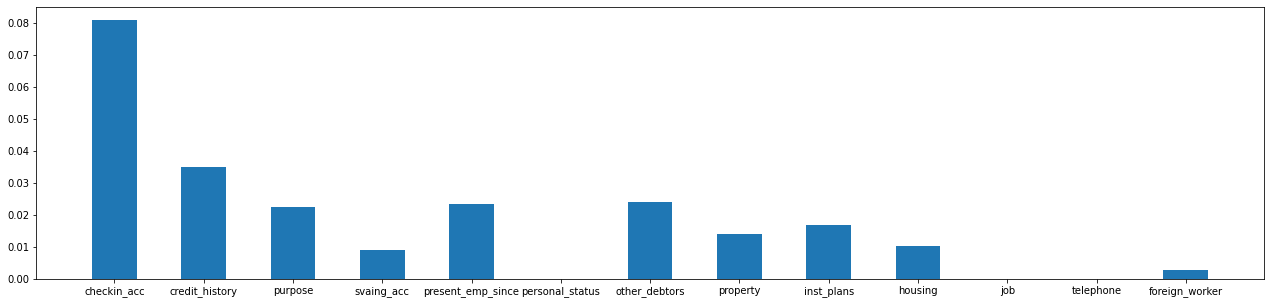

In [ ]:
# what are scores for the features
for i,feature in enumerate(categorical_features):
  print('%s: %f' % (feature, fs.scores_[i]))
# plot the scores
fig = plt.figure(figsize = (22, 5)) 
plt.bar(categorical_features, fs.scores_, width=0.5)
plt.show()

In [ ]:
# Selecting final categorical features having highest score
categorical_features_sel = [feature for i,feature in enumerate(categorical_features) if fs.scores_[i]!=0 or fs.scores_[i]>0]
categorical_features_sel

['checkin_acc',
 'credit_history',
 'purpose',
 'svaing_acc',
 'present_emp_since',
 'other_debtors',
 'property',
 'inst_plans',
 'housing',
 'foreign_worker']

## **5. Data Transformation**

**Numerical Features**

In [ ]:
# Selecting numerical features which are having more than 4 unique classes and also highest scores
continuous_feature = [feature for feature, count in (dataset[numerical_features_sel].nunique()).iteritems() if count>4]

In [ ]:
# Creating a function to plot graph
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

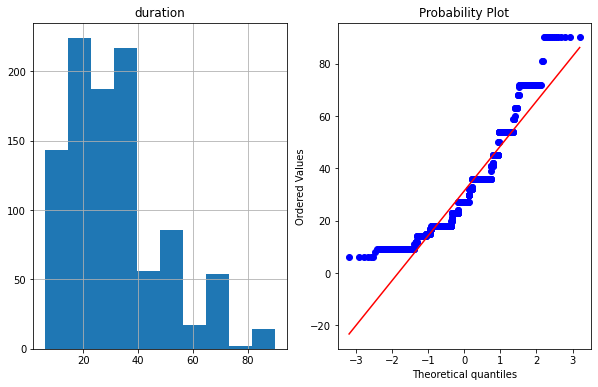

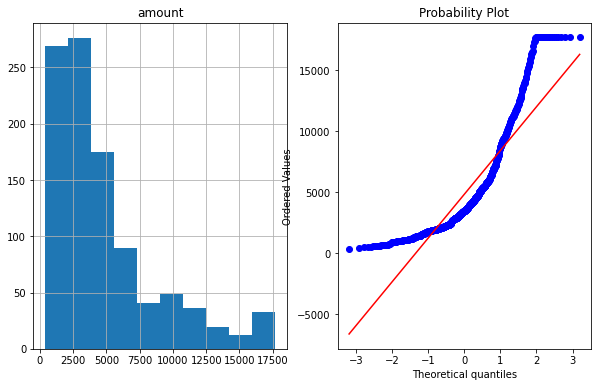

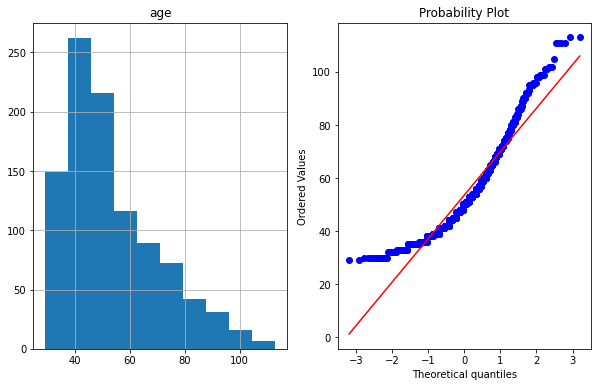

In [ ]:
# Ploting selected numerical features to check the distribution of data
for feature in continuous_feature:
  plot_data(dataset,feature)

In [ ]:
#Checking skewness of distribution
dataset[continuous_feature].skew()

duration    1.067077
amount      1.586175
age         1.020162
dtype: float64

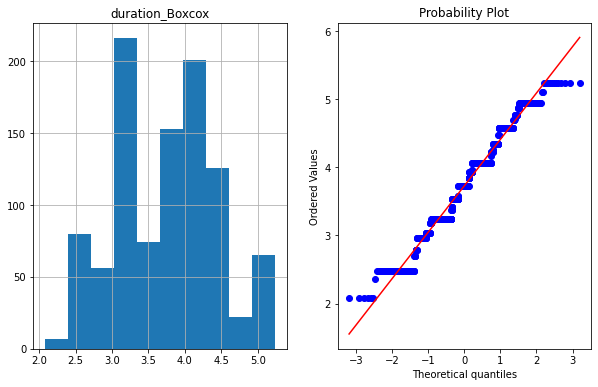

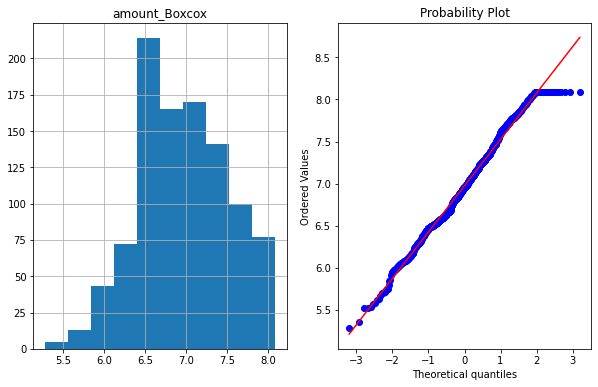

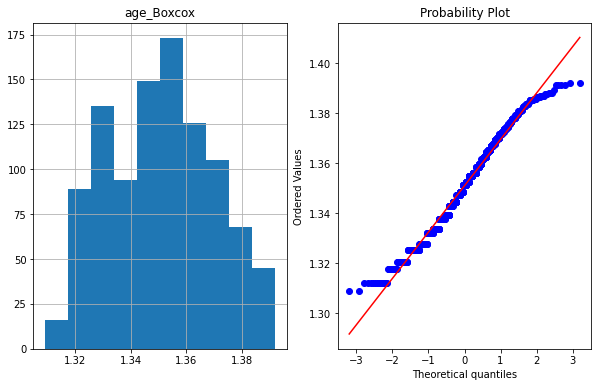

In [ ]:
#Applying Boxcox transformation to make our data Normally Distributed and then plotting again
for feature in continuous_feature:
  dataset[feature + '_Boxcox'], parameters = stat.boxcox(dataset[feature]+1)
  plot_data(dataset,feature + '_Boxcox')

In [ ]:
dataset.skew()[21:]

duration_Boxcox   -0.006891
amount_Boxcox      0.004286
age_Boxcox         0.055385
dtype: float64

In [ ]:
dataset.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,duration_Boxcox,amount_Boxcox,age_Boxcox
0,0.0,9.0,4.0,4.0,1754.0,4.0,4.0,6,2.0,0.0,6,0.0,101.0,2.0,1.0,3,2.0,2,1.0,0.0,1,2.484065,6.455923,1.387732
1,1.0,72.0,2.0,4.0,8927.0,0.0,2.0,3,1.0,0.0,3,0.0,33.0,2.0,1.0,2,2.0,2,0.0,0.0,2,4.949350,7.623395,1.320448
2,3.0,18.0,4.0,7.0,3144.0,0.0,3.0,3,2.0,0.0,5,0.0,74.0,2.0,1.0,2,1.0,3,0.0,0.0,1,3.245479,6.883357,1.373717
3,0.0,63.0,2.0,3.0,11823.0,0.0,3.0,3,2.0,2.0,6,1.0,68.0,2.0,2.0,2,2.0,3,0.0,0.0,1,4.776134,7.817427,1.369374
4,0.0,36.0,3.0,0.0,7305.0,0.0,2.0,5,2.0,0.0,6,3.0,80.0,2.0,2.0,3,2.0,3,0.0,0.0,2,4.070496,7.483580,1.377509


**Categorical Features**

In [ ]:
# Selecting Categorical features 
categorical_features_Sel2 =[feature for feature in categorical_features_sel+numerical_features_sel if feature not in continuous_feature]

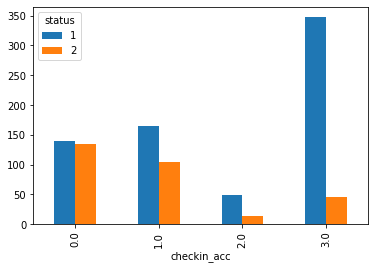

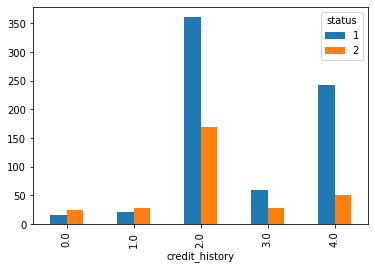

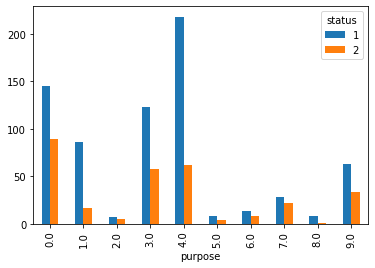

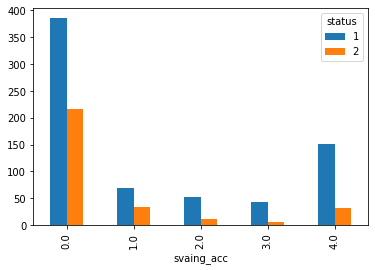

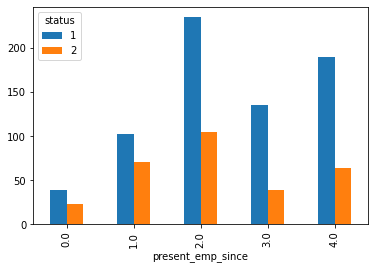

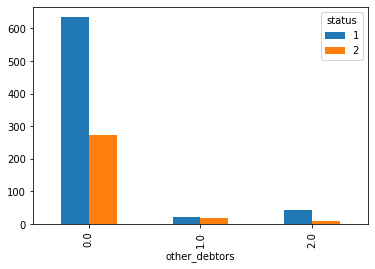

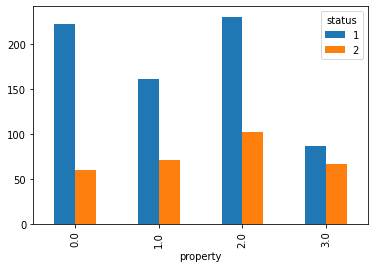

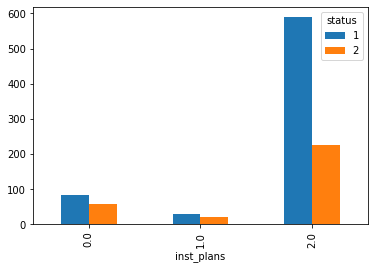

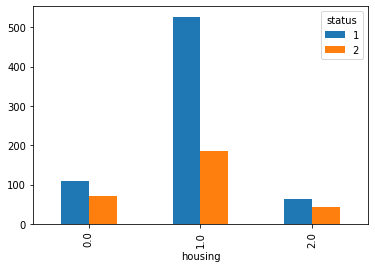

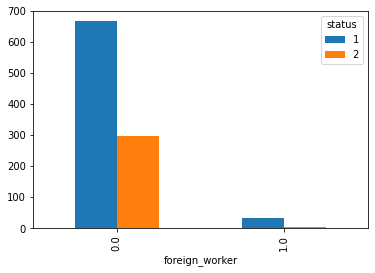

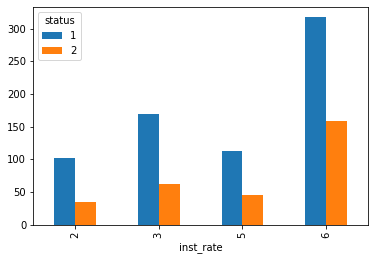

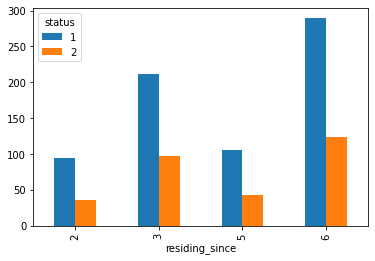

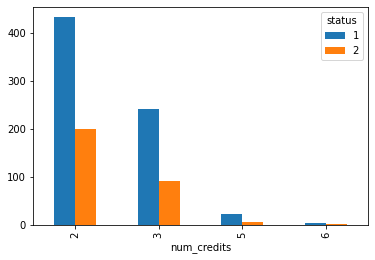

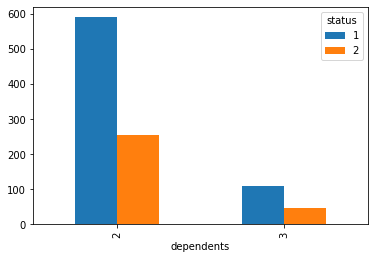

In [ ]:
# Visualizing categorical data having each unique features count of final outcome
for feature in categorical_features_Sel2:
  data = dataset.copy()
  pd.crosstab(data[feature],data.status).plot.bar()
  plt.show()

In [ ]:
#Performing Binary Encoding with categorical data
for feature in categorical_features_Sel2:
  ccategoryData = dataset[feature].value_counts()
  for categories in ccategoryData.index:
    if ccategoryData[categories]>10:
      dataset[feature+'-'+ str(categories)]=np.where(dataset[feature]==categories,1,0)

In [ ]:
#visualizing top data after Binary Encoding
dataset.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,duration_Boxcox,amount_Boxcox,age_Boxcox,checkin_acc-3.0,checkin_acc-0.0,checkin_acc-1.0,checkin_acc-2.0,credit_history-2.0,credit_history-4.0,credit_history-3.0,credit_history-1.0,credit_history-0.0,purpose-4.0,purpose-0.0,purpose-3.0,purpose-1.0,purpose-9.0,purpose-7.0,purpose-6.0,purpose-2.0,purpose-5.0,svaing_acc-0.0,svaing_acc-4.0,svaing_acc-1.0,svaing_acc-2.0,svaing_acc-3.0,present_emp_since-2.0,present_emp_since-4.0,present_emp_since-3.0,present_emp_since-1.0,present_emp_since-0.0,other_debtors-0.0,other_debtors-2.0,other_debtors-1.0,property-2.0,property-0.0,property-1.0,property-3.0,inst_plans-2.0,inst_plans-0.0,inst_plans-1.0,housing-1.0,housing-0.0,housing-2.0,foreign_worker-0.0,foreign_worker-1.0,inst_rate-6,inst_rate-3,inst_rate-5,inst_rate-2,residing_since-6,residing_since-3,residing_since-5,residing_since-2,num_credits-2,num_credits-3,num_credits-5,dependents-2,dependents-3
0,0.0,9.0,4.0,4.0,1754.0,4.0,4.0,6,2.0,0.0,6,0.0,101.0,2.0,1.0,3,2.0,2,1.0,0.0,1,2.484065,6.455923,1.387732,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,1.0,72.0,2.0,4.0,8927.0,0.0,2.0,3,1.0,0.0,3,0.0,33.0,2.0,1.0,2,2.0,2,0.0,0.0,2,4.949350,7.623395,1.320448,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
2,3.0,18.0,4.0,7.0,3144.0,0.0,3.0,3,2.0,0.0,5,0.0,74.0,2.0,1.0,2,1.0,3,0.0,0.0,1,3.245479,6.883357,1.373717,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,0.0,63.0,2.0,3.0,11823.0,0.0,3.0,3,2.0,2.0,6,1.0,68.0,2.0,2.0,2,2.0,3,0.0,0.0,1,4.776134,7.817427,1.369374,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0.0,36.0,3.0,0.0,7305.0,0.0,2.0,5,2.0,0.0,6,3.0,80.0,2.0,2.0,3,2.0,3,0.0,0.0,2,4.070496,7.483580,1.377509,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [ ]:
#Exporting data into csv file
dataset.to_csv('/content/drive/MyDrive/Max Life Insurance/Case study_M.zip (Unzipped Files)/Final_case_study_data.csv', index = False)

## **6. Modeling**

**Validation Dataset**

In [ ]:
#Importing required library
from sklearn.model_selection import train_test_split

In [ ]:
#Spiting raw data 
X = dataset[categorical_features_Sel2+continuous_feature]
Y = dataset['status']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
#Checking shape of test/validation and train data
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(800, 17)
(800,)
(200, 17)
(200,)


In [ ]:
#Spliting transformed data 
X2 = dataset.iloc[:,21:]
Y2 = dataset['status']
validation_size = 0.20
seed = 7
X_train2, X_validation2, Y_train2, Y_validation2 = train_test_split(X2, Y2, test_size=validation_size, random_state=seed)

In [ ]:
#Checking the shape of the data
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(800, 17)
(800,)
(200, 17)
(200,)


**Evaluate Model**

In [ ]:
#Importing Repquired Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from numpy import mean
from numpy import std
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2)  

In [ ]:
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(f2_measure)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

In [ ]:
# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LR')
  # LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  # NB
  models.append(GaussianNB())
  names.append('NB')
  # GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  # SVM
  models.append(SVC(gamma='scale'))
  names.append('SVM')
  return models, names

In [ ]:
# define models
models, names = get_models()

In [ ]:
results = list()
# evaluate each model
for i in range(len(models)):
  # wrap the model in a pipeline
  pipeline = Pipeline(steps=[('m',models[i])])
  # evaluate the model and store results
  scores = evaluate_model(X_train, Y_train, pipeline)
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.851 (0.039)
>LDA 0.844 (0.045)
>NB 0.779 (0.056)
>GPC 0.745 (0.047)
>SVM 0.906 (0.013)


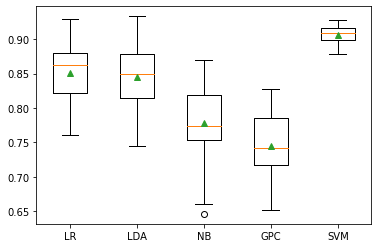

In [ ]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
results = list()
# evaluate each model
for i in range(len(models)):
  # wrap the model in a pipeline
  pipeline = Pipeline(steps=[('m',models[i])])
  # evaluate the model and store results
  scores = evaluate_model(X_train2, Y_train2, pipeline)
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.845 (0.045)
>LDA 0.840 (0.042)
>NB 0.718 (0.049)
>GPC 0.899 (0.020)
>SVM 0.910 (0.017)


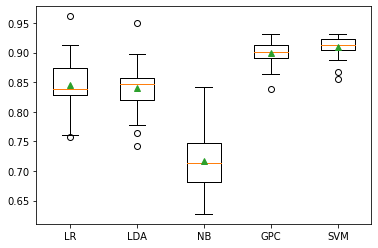

In [ ]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
continuous_feature_new= [feature+'_Boxcox' for feature in continuous_feature]
continuous_feature_new

['duration_Boxcox', 'amount_Boxcox', 'age_Boxcox']

In [ ]:
results = list()
for i in range(len(models)):
  # one hot encode categorical, normalize numerical
  ct = ColumnTransformer([('n',MinMaxScaler(),continuous_feature_new)])
  # wrap the model in a pipeline
  pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
  # evaluate the model and store results
  scores = evaluate_model(X_train2, Y_train2, pipeline)
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.912 (0.009)
>LDA 0.901 (0.018)
>NB 0.861 (0.025)
>GPC 0.911 (0.010)
>SVM 0.909 (0.011)


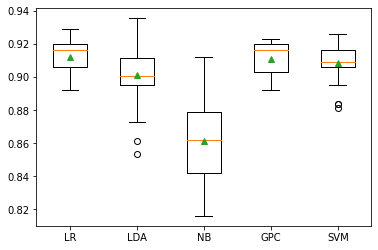

In [ ]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
results = list()
for i in range(len(models)):
  # one hot encode categorical, normalize numerical
  ct = ColumnTransformer([('n',StandardScaler(),continuous_feature_new)])
  # wrap the model in a pipeline
  pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
  # evaluate the model and store results
  scores = evaluate_model(X_train2, Y_train2, pipeline)
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.901 (0.019)
>LDA 0.901 (0.018)
>NB 0.861 (0.025)
>GPC 0.889 (0.020)
>SVM 0.907 (0.011)


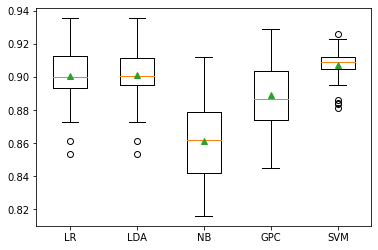

In [ ]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**ML Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Tune scaled SVM
#scaler = MinMaxScaler()
scaler=StandardScaler()
rescaledX = scaler.fit_transform(X_train2)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
metric = make_scorer(f2_measure)
cvKfold = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metric, cv=cvKfold)
grid_result = grid.fit(rescaledX, Y_train2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.917105 using {'C': 0.1, 'kernel': 'poly'}
0.837263 (0.045416) with: {'C': 0.1, 'kernel': 'linear'}
0.917105 (0.001316) with: {'C': 0.1, 'kernel': 'poly'}
0.917105 (0.001316) with: {'C': 0.1, 'kernel': 'rbf'}
0.917105 (0.001316) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.834366 (0.043111) with: {'C': 0.3, 'kernel': 'linear'}
0.913697 (0.008669) with: {'C': 0.3, 'kernel': 'poly'}
0.916705 (0.003627) with: {'C': 0.3, 'kernel': 'rbf'}
0.885195 (0.029564) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.834282 (0.042205) with: {'C': 0.5, 'kernel': 'linear'}
0.912901 (0.011845) with: {'C': 0.5, 'kernel': 'poly'}
0.904267 (0.020019) with: {'C': 0.5, 'kernel': 'rbf'}
0.868584 (0.035762) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.835869 (0.042549) with: {'C': 0.7, 'kernel': 'linear'}
0.905081 (0.015854) with: {'C': 0.7, 'kernel': 'poly'}
0.888093 (0.032053) with: {'C': 0.7, 'kernel': 'rbf'}
0.855075 (0.039949) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.835690 (0.042551) with: {'C': 0.9, 'kernel': 'linear

**Ensemble Method**

In [ ]:
#Importing required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.725000 (0.048734)
GBM: 0.748750 (0.038911)
RF: 0.751250 (0.054040)
ET: 0.760000 (0.056125)


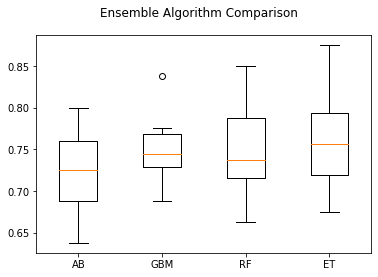

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Final Model**

In [ ]:
# prepare the model
model = SVC(C=0.1)
model.fit(X_train2, Y_train2)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_validation2)
predictions = model.predict(X_validation2)
print(accuracy_score(Y_validation2, predictions))
print(confusion_matrix(Y_validation2, predictions))
print(classification_report(Y_validation2, predictions))

0.775
[[146   3]
 [ 42   9]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       149
           2       0.75      0.18      0.29        51

    accuracy                           0.78       200
   macro avg       0.76      0.58      0.58       200
weighted avg       0.77      0.78      0.72       200

